## 🎮 EDA - VIDEO GAME SALES
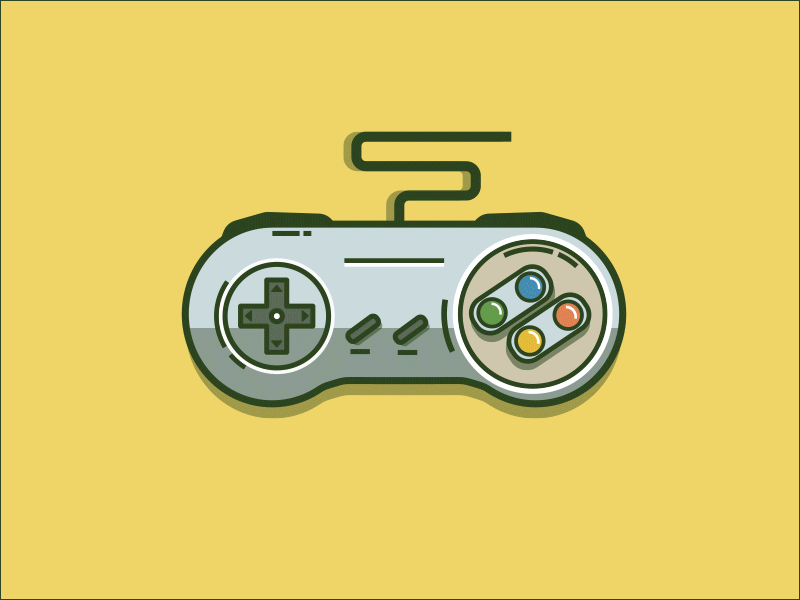

In [2]:
print("Working Fine")

Working Fine


In [1]:
import pandas as pd

In [2]:
video_game_df = pd.read_csv(r'D:\Python\Project\video game sales\artifacts\vgsales.csv')

In [3]:
## Features present in dataset 
video_game_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
video_game_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [5]:
video_game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
has_missing  = video_game_df.isnull().any()
nonzero_missing = video_game_df.loc[:, has_missing]
missing_values = nonzero_missing.isnull().sum()
missing_values

Year         271
Publisher     58
dtype: int64

In [7]:
for col in missing_values.index:

    col_missing_value = 100 * (missing_values[col] /16598)
    print(f'{col}: {col_missing_value:.2f}%')


Year: 1.63%
Publisher: 0.35%


Observation and action to be taken:  
* Data types are in correct format  
* Rank features can be dropped
* Missing values are present in year and publisher. Especially for the 'Publisher' column, dropping them entirely isn't recommended as it may lead to loss of valuable information. Handling the missing data becomes crucial at this point.

In [26]:
## NaN values will be filled with median values for year and mode for publisher

In [8]:
import numpy as np

In [9]:
video_game_df['Year'].isna().sum()

271

In [10]:
video_game_df['Year'].fillna(np.median(video_game_df['Year']), inplace=True)

In [11]:
video_game_df[video_game_df['Year'].isna()]

Rank                         Name Platform  Year         Genre  \
179      180              Madden NFL 2004      PS2   NaN        Sports   
377      378             FIFA Soccer 2004      PS2   NaN        Sports   
431      432   LEGO Batman: The Videogame      Wii   NaN        Action   
470      471   wwe Smackdown vs. Raw 2006      PS2   NaN      Fighting   
607      608               Space Invaders     2600   NaN       Shooter   
...      ...                          ...      ...   ...           ...   
16307  16310                Freaky Flyers       GC   NaN        Racing   
16327  16330                    Inversion       PC   NaN       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan      PS3   NaN     Adventure   
16427  16430                 Virtua Quest       GC   NaN  Role-Playing   
16493  16496                   The Smurfs      3DS   NaN        Action   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           Electronic Arts      4.26      0.26      0.01   
377                           Electronic Arts      0.59      2.36      0.04   
431    Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
470                                       NaN      1.57      1.02      0.00   
607                                     Atari      2.36      0.14      0.00   
...                                       ...       ...       ...       ...   
16307                                 Unknown      0.01      0.00      0.00   
16327                      Namco Bandai Games      0.01      0.00      0.00   
16366                                 Unknown      0.01      0.00      0.00   
16427                                 Unknown      0.01      0.00      0.00   
16493                                 Unknown      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
179           0.71          5.23  
377           0.51          3.49  
431           0.29          3.17  
470           0.41          3.00  
607           0.03          2.53  
...            ...           ...  
16307         0.00          0.01  
16327         0.00          0.01  
16366         0.00          0.01  
16427         0.00          0.01  
16493         0.00          0.01  

[271 rows x 11 columns]

In [12]:
video_game_df["Year"].fillna(video_game_df["Year"][~video_game_df["Year"].isna()].median(), inplace=True)

In [13]:
video_game_df["Year"].isna().sum()

0

In [14]:
video_game_df['Publisher'].mode()

0    Electronic Arts
Name: Publisher, dtype: object

In [15]:
video_game_df['Publisher'].fillna('Electronic Arts', inplace=True)

In [16]:
video_game_df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [17]:
## Checking for unique values in platform feature

video_game_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [45]:
video_game_df['Platform'].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

platform feature contains 2600 (name) and total 133 values hence it is assumed that the platform name is valid

## Descriptive Analysis

This can be done through frequency tables, graphs and measures of central tendency, such as mean, median, mode, dispersion measures such as standard deviation, percentiles and quartiles.

### Frequency distribution

In [18]:
import plotly.express as px

In [47]:
video_game_df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [65]:
import plotly.express as px
import plotly.subplots as SP

global_sales_gt = video_game_df[video_game_df['Global_Sales'] > 2.5]
global_sales_lt = video_game_df[video_game_df['Global_Sales'] <= 2.5]
fig = SP.make_subplots(shared_xaxes=True, rows=1, cols=2)
fig.add_trace(px.histogram(global_sales_gt, x='Global_Sales', title='Global Sales (Greater Than 2.5)', color_discrete_sequence=["#FFC107"]).data[0], row=1, col=1)
fig.add_trace(px.histogram(global_sales_lt, x='Global_Sales', title='Global Sales (Less Than or Equal to 2.5)', color_discrete_sequence=["#4CAF50"]).data[0], row=1, col=2)

# Add titles to subplots
fig.update_xaxes(title_text="Global Sales (Greater Than 2.5)", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Global Sales (Less Than or Equal to 2.5)", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_layout(height=600, width=900, legend={'traceorder':'normal'}, title_text="Global Sales Distribution")
fig.show()



Top 3 highest count of global sales < 2.5 million range: 
   
0 - 0.9 is 5781  
0.1 - 0.19 is 3083  
0.2 - 0.29 is 1779  


Top 3 highest count of global sales > 2.5 million range:  
   
2.6 - 2.69 is 34  
2.8 - 2.89 is 29  
2.7 - 2.79 is 28 

In [86]:
melted_df = pd.melt(video_game_df, id_vars=["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "Global_Sales"],
                    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
                    var_name="Location", value_name="Sales")

# Get top 10 sales for each location
top_10_df = melted_df.groupby('Location').apply(lambda x: x.nlargest(10, 'Sales')).reset_index(drop=True)

# Create bubble plot
fig = px.scatter(top_10_df, x="Global_Sales", y="Sales", size="Global_Sales", color="Platform",
                 hover_name="Name", facet_col="Location", labels={"Sales": "Sales", "Global_Sales": "Global Sales"},
                 title="Top 10 Sales by Location and Platform", facet_col_wrap=2)
fig.show()

|  Location  |  Sales  |  Global Sales(Max)  |  Game  |  Platform  |
|------------|---------|------------|------------|----------------|
|EU|29.02|82.74|wii sports|Wii|  
|JP|10.22|40.24|Super Mario Bros.|NES|
|NA|41.49|82.74|wii sports|Wii|
|Other|10.57|82.74|wii sports|Wii|

In [76]:
top_10_df[top_10_df['Location'] == 'EU_Sales']

Rank                                          Name Platform    Year  \
0     1                                    Wii Sports      Wii  2006.0   
1     3                                Mario Kart Wii      Wii  2008.0   
2     4                             Wii Sports Resort      Wii  2009.0   
3    11                                    Nintendogs       DS  2005.0   
4    17                            Grand Theft Auto V      PS3  2013.0   
5    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   
6     7                         New Super Mario Bros.       DS  2006.0   
7     8                                      Wii Play      Wii  2006.0   
8     5                      Pokemon Red/Pokemon Blue       GB  1996.0   
9    15                                  Wii Fit Plus      Wii  2009.0   

          Genre             Publisher  Global_Sales  Location  Sales  
0        Sports              Nintendo         82.74  EU_Sales  29.02  
1        Racing              Nintendo         35.82  EU_Sales  12.88  
2        Sports              Nintendo         33.00  EU_Sales  11.01  
3    Simulation              Nintendo         24.76  EU_Sales  11.00  
4        Action  Take-Two Interactive         21.40  EU_Sales   9.27  
5          Misc              Nintendo         20.22  EU_Sales   9.26  
6      Platform              Nintendo         30.01  EU_Sales   9.23  
7          Misc              Nintendo         29.02  EU_Sales   9.20  
8  Role-Playing              Nintendo         31.37  EU_Sales   8.89  
9        Sports              Nintendo         22.00  EU_Sales   8.59

In [89]:
jp_top_10_sales = top_10_df[top_10_df['Location'] == 'JP_Sales']
jp_top_10_sales

Rank                                         Name Platform    Year  \
10     5                     Pokemon Red/Pokemon Blue       GB  1996.0   
11    13                  Pokemon Gold/Pokemon Silver       GB  1999.0   
12     2                            Super Mario Bros.      NES  1985.0   
13     7                        New Super Mario Bros.       DS  2006.0   
14    21                Pokemon Diamond/Pokemon Pearl       DS  2006.0   
15    27                  Pokemon Black/Pokemon White       DS  2010.0   
16    26                Pokemon Ruby/Pokemon Sapphire      GBA  2002.0   
17    42                  Animal Crossing: Wild World       DS  2005.0   
18    28  Brain Age 2: More Training in Minutes a Day       DS  2005.0   
19   215                     Monster Hunter Freedom 3      PSP  2010.0   

           Genre Publisher  Global_Sales  Location  Sales  
10  Role-Playing  Nintendo         31.37  JP_Sales  10.22  
11  Role-Playing  Nintendo         23.10  JP_Sales   7.20  
12      Platform  Nintendo         40.24  JP_Sales   6.81  
13      Platform  Nintendo         30.01  JP_Sales   6.50  
14  Role-Playing  Nintendo         18.36  JP_Sales   6.04  
15  Role-Playing  Nintendo         15.32  JP_Sales   5.65  
16  Role-Playing  Nintendo         15.85  JP_Sales   5.38  
17    Simulation  Nintendo         12.27  JP_Sales   5.33  
18        Puzzle  Nintendo         15.30  JP_Sales   5.32  
19  Role-Playing    Capcom          4.87  JP_Sales   4.87

In [91]:
NA_top_10_sales = top_10_df[top_10_df['Location'] == 'NA_Sales']
NA_top_10_sales

Rank                       Name Platform    Year     Genre  \
20     1                 Wii Sports      Wii  2006.0    Sports   
21     2          Super Mario Bros.      NES  1985.0  Platform   
22    10                  Duck Hunt      NES  1984.0   Shooter   
23     6                     Tetris       GB  1989.0    Puzzle   
24     3             Mario Kart Wii      Wii  2008.0    Racing   
25     4          Wii Sports Resort      Wii  2009.0    Sports   
26    16         Kinect Adventures!     X360  2010.0      Misc   
27     9  New Super Mario Bros. Wii      Wii  2009.0  Platform   
28     8                   Wii Play      Wii  2006.0      Misc   
29    19          Super Mario World     SNES  1990.0  Platform   

                 Publisher  Global_Sales  Location  Sales  
20                Nintendo         82.74  NA_Sales  41.49  
21                Nintendo         40.24  NA_Sales  29.08  
22                Nintendo         28.31  NA_Sales  26.93  
23                Nintendo         30.26  NA_Sales  23.20  
24                Nintendo         35.82  NA_Sales  15.85  
25                Nintendo         33.00  NA_Sales  15.75  
26  Microsoft Game Studios         21.82  NA_Sales  14.97  
27                Nintendo         28.62  NA_Sales  14.59  
28                Nintendo         29.02  NA_Sales  14.03  
29                Nintendo         20.61  NA_Sales  12.78

In [85]:
Other_top_10_sales = top_10_df[top_10_df['Location'] == 'Other_Sales']
Other_top_10_sales

Rank                           Name Platform    Year       Genre  \
30    18  Grand Theft Auto: San Andreas      PS2  2004.0      Action   
31     1                     Wii Sports      Wii  2006.0      Sports   
32    48                 Gran Turismo 4      PS2  2004.0      Racing   
33    17             Grand Theft Auto V      PS3  2013.0      Action   
34     3                 Mario Kart Wii      Wii  2008.0      Racing   
35     4              Wii Sports Resort      Wii  2009.0      Sports   
36   349      Pro Evolution Soccer 2008      PS2  2007.0      Sports   
37     7          New Super Mario Bros.       DS  2006.0    Platform   
38     8                       Wii Play      Wii  2006.0        Misc   
39    11                     Nintendogs       DS  2005.0  Simulation   

                       Publisher  Global_Sales     Location  Sales  
30          Take-Two Interactive         20.81  Other_Sales  10.57  
31                      Nintendo         82.74  Other_Sales   8.46  
32   Sony Computer Entertainment         11.66  Other_Sales   7.53  
33          Take-Two Interactive         21.40  Other_Sales   4.14  
34                      Nintendo         35.82  Other_Sales   3.31  
35                      Nintendo         33.00  Other_Sales   2.96  
36  Konami Digital Entertainment          3.63  Other_Sales   2.93  
37                      Nintendo         30.01  Other_Sales   2.90  
38                      Nintendo         29.02  Other_Sales   2.85  
39                      Nintendo         24.76  Other_Sales   2.75

In [92]:
video_game_df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [94]:
import plotly as plt

In [117]:
top_n = 5  # Change this to visualize top N games
top_n_df = video_game_df.head(top_n)
bar_fig = px.bar(top_n_df, x='Name', y='Global_Sales', title=f'Top {top_n} Games by Global Sales',
                 labels={'Global_Sales': 'Global Sales', 'Name': 'Game Name'})
bar_fig.show()

<Axes: ylabel='Name'>

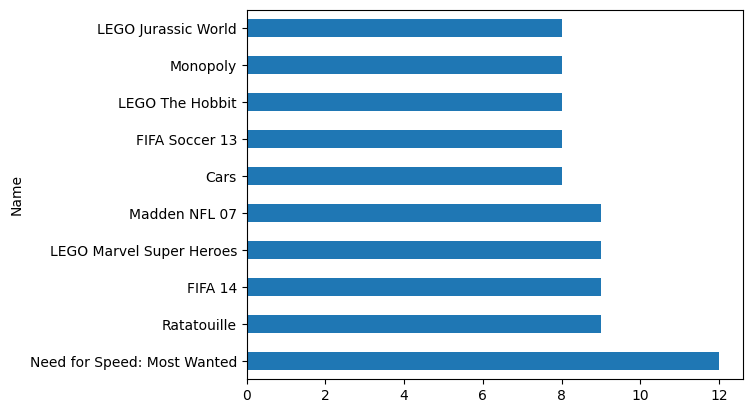

In [121]:
video_game_df['Name'].value_counts().head(10).plot(kind='barh')

In [105]:
# 3. Pie Chart for Genre Distribution
genre_counts = video_game_df['Genre'].value_counts()
genre_pie_fig = px.pie(names=genre_counts.index, values=genre_counts.values, title='Genre Distribution')
genre_pie_fig.show()

In [111]:

box_fig = px.box(video_game_df, y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], title='Sales Distribution by Region')
box_fig.show()

In [110]:

melted_df = pd.melt(video_game_df, id_vars=["Rank", "Name", "Platform", "Year", "Genre", "Publisher"],
                     value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
                     var_name="Location", value_name="Sales")


genre_location_sales = melted_df.groupby(["Genre", "Location"])["Sales"].sum().reset_index()


genre_location_sales = genre_location_sales.sort_values(by='Sales', ascending=False)

fig = px.bar(genre_location_sales, x="Genre", y="Sales", color="Location",
             title="Game Genre Distribution Over Locations (Sorted by Genre)",
             labels={"Sales": "Total Sales", "Genre": "Game Genre", "Location": "Location"})
fig.show()

In [128]:
platform_counts = video_game_df['Platform'].value_counts().head(10)
platform_counts_df = pd.DataFrame({'Platform': platform_counts.index, 'Count': platform_counts.values}).sort_values(by='Count', ascending=True)
bar_fig = px.bar(platform_counts_df, y='Platform', x='Count', orientation='h',
                 title='Top 10 Platforms by Count',
                 labels={'Count': 'Count', 'Platform': 'Platform'})
bar_fig.show()

In [134]:
games_counts = video_game_df['Name'].value_counts().head(10)
platform_counts_df = pd.DataFrame({'Name': games_counts.index, 'Count': games_counts.values}).sort_values(by='Count', ascending=True)
bar_fig = px.bar(platform_counts_df, y='Name', x='Count', orientation='h',
                 title='Top 10 Games by Count',
                 labels={'Count': 'Count', 'Games': 'Games'})
bar_fig.show()

In [135]:
video_game_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [136]:
video_game_df.drop(columns=['Rank'], inplace=True)

In [138]:
video_game_df.to_csv(r'D:\Python\Project\video game sales\artifacts\vgsales_cleaned.csv', index=False)

In [140]:
video_game_df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [23]:
genre_sales = video_game_df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort genres by total sales in descending order and select top 10
top_10_genre = genre_sales.sort_values(by='Global_Sales', ascending=True).head(10)

# Create a horizontal bar plot using Plotly
fig = px.bar(top_10_genre, 
             x='Global_Sales', 
             y='Genre', 
             orientation='h', 
             title='Top 10 Genres by Global Sales',
             labels={'Global_Sales': 'Global Sales (in millions)', 'Genre': 'Genre'})

fig.show()

In [24]:
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    # Group by genre and calculate total sales for the current region
    genre_sales = video_game_df.groupby('Genre')[region].sum().reset_index()
    # Sort genres by total sales in descending order and select top 10
    top_10_genre = genre_sales.sort_values(by=region, ascending=True).head(10)
    # Create a horizontal bar plot using Plotly
    fig = px.bar(top_10_genre, 
                 x=region, 
                 y='Genre', 
                 orientation='h', 
                 title=f'Top 10 Genres by Sales in {region[:-6]}',
                 labels={region: f'Sales in {region[:-6]} (in millions)', 'Genre': 'Genre'})
    fig.show()

In [22]:
# Melt the dataframe to create a long-format dataframe for plotly
df_melted = video_game_df.melt(id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                    var_name='Region', value_name='Sales')

# Create a box plot using Plotly
fig = px.box(df_melted, x='Genre', y='Sales', color='Region', title='Distribution of Sales Across Genres',
             labels={'Sales': 'Sales (in millions)', 'Genre': 'Genre', 'Region': 'Region'})
fig.show()